# The Sparks Foundation : Data Science and Business Analytics Intern

## Author: Purvit Vashishtha

## Task 2

* Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns= iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


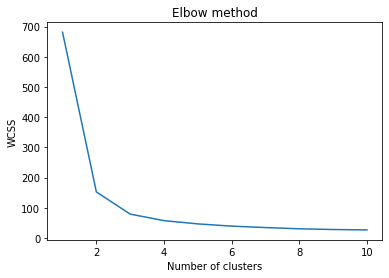

In [12]:
# Finding optimum value of K for K-Means Clustering using ELbow Method
x = data.values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_init=10, n_clusters=i, init="k-means++", max_iter=300, random_state=None)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

* Therefore, we select value of K as 3 according to elbow method 

In [13]:
# applying kmeans clustering
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, init = "k-means++", random_state=None)

y_kmeans = kmeans.fit_predict(x)

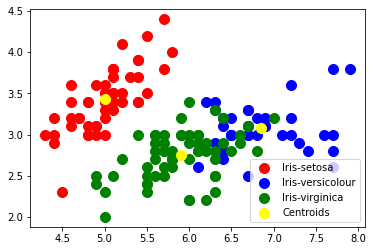

In [16]:
# Scatterplot of first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, label="Centroids", c="yellow")
plt.legend()